<a href="https://colab.research.google.com/github/sam22ridhi/AIML/blob/main/ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('train.csv')

In [7]:
data.head()

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516,item_weight,0.709 gram
3,https://m.media-amazon.com/images/I/612mrlqiI4...,459516,item_weight,0.709 gram
4,https://m.media-amazon.com/images/I/617Tl40LOX...,731432,item_weight,1400 milligram


In [45]:
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Rows: 263859, Columns: 4


In [47]:
print(data.memory_usage(deep=True).sum())

65876471


In [35]:
data.iloc[2,0]

'https://m.media-amazon.com/images/I/61BZ4zrjZXL.jpg'

In [2]:
from glob import glob
from tqdm.notebook import tqdm
from PIL import Image
import matplotlib.pyplot as plt

#pytesseract
#easyocr
#kerasocr

In [9]:
import requests

In [13]:
def download_image(url):
    """Downloads an image from the specified URL and returns a PIL Image object."""
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        image = Image.open(io.BytesIO(response.content))
        return image
    except Exception as e:
        print(f"Error downloading image from {url}: {e}")
        return None

In [17]:
import io

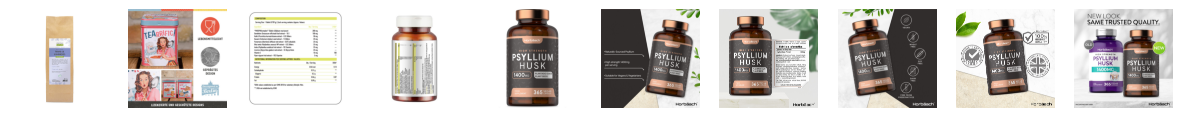

In [18]:
images = []

# Loop through the first 5 rows in the DataFrame to download images
for index, row in data.iterrows():
    if index < 10:  # Only download the first 5 images
        image_url = row['image_link']
        image = download_image(image_url)
        if image:
            images.append(image)

# Display the downloaded images
if images:
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):  # Display only the downloaded images
        plt.subplot(1, len(images), i + 1)  # Create a subplot for each image
        plt.imshow(images[i])
        plt.axis('off')  # Hide axes
    plt.show()
else:
    print("No images were downloaded.")

In [6]:
pip install pytesseract

In [7]:
# Install Tesseract OCR
!apt-get update
!apt-get install -y tesseract-ocr

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,313 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,439 kB]
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:14 http://security.

In [10]:
!tesseract --version


tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [11]:
import pytesseract

# Set Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'


In [ ]:
import pytesseract

In [21]:
print(pytesseract.image_to_string(images[7],lang='eng'))

 

   

Yara
FREE

 

A we
coy Si SOY
as
LANTAGO OVATA
LNT SEEDS

PrN a A

3 6 ee bed YN pls
uy

FREE FROM
PRESERVATIVES

    
    
 

Horbaach



In [ ]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 15.6 MB/s eta 0:00:00


In [ ]:
#easyocr
import easyocr
reader=easyocr.Reader(['en'],gpu=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

In [ ]:
results=reader.readtext(images[6])

In [ ]:
results

[([[289, 61], [581, 61], [581, 79], [289, 79]],
  'LLa eelE=_',
  0.0007747083228779691),
 ([[343, 83], [433, 83], [433, 99], [343, 99]], '62', 0.6833567335620933),
 ([[505, 105], [593, 105], [593, 123], [505, 123]], 'R', 0.011841198661202645),
 ([[328, 237], [587, 237], [587, 353], [328, 353]],
  'RRIFICH',
  0.28512930876881565),
 ([[841, 341], [1153, 341], [1153, 383], [841, 383]],
  'LEBENSMITTELECHT',
  0.9993236383897186),
 ([[249, 431], [311, 431], [311, 473], [249, 473]],
  'Cwwv',
  0.43178483843803406),
 ([[258, 452], [320, 452], [320, 502], [258, 502]], 'DAV', 0.5323015630576684),
 ([[902, 708], [1094, 708], [1094, 758], [902, 758]],
  'GEPRAGTES',
  0.9980304076502575),
 ([[937, 761], [1059, 761], [1059, 803], [937, 803]],
  'DESIGN',
  0.99646868339085),
 ([[436, 906], [574, 906], [574, 954], [436, 954]],
  'As YQULIKE',
  0.2808490858232691),
 ([[619, 899], [681, 899], [681, 940], [619, 940]],
  'BEST',
  0.9948495030403137),
 ([[898, 920], [1093, 920], [1093, 956], [898,

In [ ]:
results[0]

([[639, 811], [983, 811], [983, 877], [639, 877]],
 'HOrbaach',
 0.6110116601165128)

In [ ]:
!pip install keras-ocr -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.4 MB/s eta 0:00:00


In [15]:
import io

In [2]:
images = []
for index, row in tqdm(data.iterrows(), total=len(data), desc="Downloading Images"):
    image_url = row['image_link']
    image = download_image(image_url)
    if image is not None:
        images.append(image)

print("Download complete.")

NameError: name 'tqdm' is not defined

In [ ]:
import keras_ocr

In [ ]:
!pip install -U keras-ocr -q # Update keras-ocr to the latest version to ensure compatibility.
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline(images)

ValueError: Unrecognized keyword arguments passed to Dense: {'weights': [array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32), array([1., 0., 0., 0., 1., 0.], dtype=float32)]}

In [ ]:
# Initialize the Keras OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()


Looking for /root/.keras-ocr/craft_mlt_25k.h5


ValueError: Unrecognized keyword arguments passed to Dense: {'weights': [array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32), array([1., 0., 0., 0., 1., 0.], dtype=float32)]}

In [ ]:
import keras_ocr
import os

# Ensure the directory exists
model_dir = os.path.expanduser('~/.keras-ocr')
os.makedirs(model_dir, exist_ok=True)

# Initialize the Keras OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()


Looking for /root/.keras-ocr/craft_mlt_25k.h5


ValueError: Unrecognized keyword arguments passed to Dense: {'weights': [array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32), array([1., 0., 0., 0., 1., 0.], dtype=float32)]}

In [23]:
pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 26.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

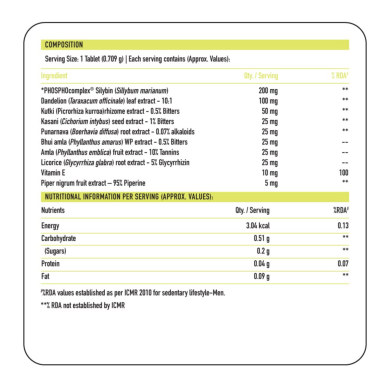

Progress: |███████████████████████████████████████████████████| 102.3% Complete([[100, 89], [216, 89], [216, 115], [100, 115]], 'COMPOSITION', 0.9887078097659996)
([[95, 127], [205, 127], [205, 163], [95, 163]], 'Serving Size:', 0.741974970855553)
([[214, 132], [334, 132], [334, 162], [214, 162]], 'Tablet (0.709 g)', 0.8805804806075319)
([[343, 127], [649, 127], [649, 163], [343, 163]], 'Each serving contains (Approx Values):', 0.8511553380516226)
([[85, 178], [172, 178], [172, 211], [85, 211]], 'Ingredient', 0.9769130111225227)
([[679, 177], [788, 177], [788, 213], [679, 213]], 'Oty / Serving', 0.38818632444012435)
([[936, 180], [992, 180], [992, 208], [936, 208]], '% RDA"', 0.9605556608541886)
([[85, 224], [466, 224], [466, 256], [85, 256]], '#PHOSPHOcomplex@ Silybin (Sillybum marianum)', 0.6787596978265444)
([[724, 224], [786, 224], [786, 254], [724, 254]], '200 mg', 0.9350320768903153)
([[88, 254], [430, 254], [430, 282], [88, 282]], 'Dandelion (Taraxacum officinale) leaf extract',

In [36]:
import easyocr
import matplotlib.pyplot as plt
import cv2
import requests
from PIL import Image
from io import BytesIO

# Initialize the reader object with the languages you need (e.g., English)
reader = easyocr.Reader(['en'])

# Define a function to download and display the image
def display_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# Image URL example
image_url = 'https://m.media-amazon.com/images/I/61BZ4zrjZXL.jpg'

# Display the image
img = display_image_from_url(image_url)
plt.imshow(img)
plt.axis('off')
plt.show()

# OCR Text Recognition
result = reader.readtext(image_url)

# Print OCR results
for detection in result:
    print(detection)


In [37]:
#preprocessing of images for accuracy in text detection
import numpy as np
def preprocess_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)  # Convert to OpenCV format
    gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    return gray


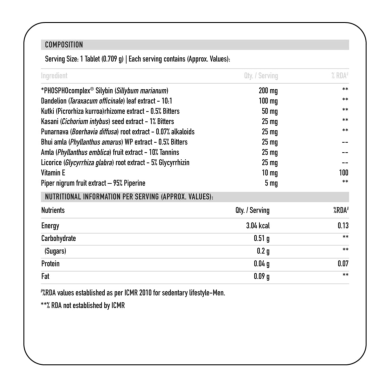

In [38]:
gray_image = preprocess_image(image_url)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

In [39]:
extracted_text = pytesseract.image_to_string(gray_image)
print(extracted_text)

COMPOSITION
Serving Size: 1 Tablet (0.709 g) | Each serving contains (Approx. Values):

*PHOSPHOcomplex® Silybin (Sillybum marianum)
Dandelion (Taraxacum officinale) leaf extract - 10:1
Kutki (Picrorhiza kurroa)rhizome extract - 0.5% Bitters
Kasani (Cichorium intybus) seed extract - 1% Bitters
Punarnava (Boerhavia diffusa) root extract - 0.07% alkaloids
Bhui amla (Phyllanthus amarus) WP extract - 0.5%, Bitters
Amla (Phyllanthus emblica) fruit extract - 10% Tannins
Licorice (Glycyrrhiza glabra) root extract - 5% Glycyrrhizin
Vitamin E
Piper nigrum fruit extract — 95% Piperine

NUTRITIONAL INFORMATION PER SERVING (APPROX. VALUES):

Nutrients

Energy

Carbohydrate
(Sugars)

Protein

Fat

"ZRDA values established as per ICMR 2010 for sedentary lifestyle-Men.
**Z RDA not established by ICMR

200 mg
100 mg
50 mg
25 mg
25 mg
25 mg
25 mg
25 mg
10 mg
5 mg

Qty. / Serving

3.04 kcal
O51 g
02g
0.049
0.09 g

 



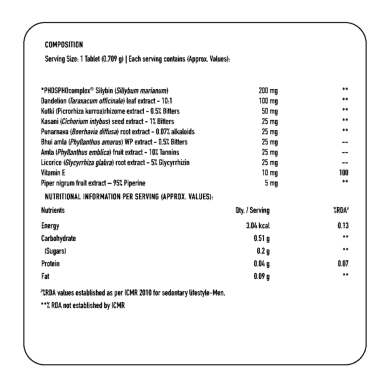

COMPOSITION
Serving Size: 1 Tablet (0.709 g) | Each serving contains (Approx. Values):

*PHOSPHOcomplex® Silybin (Sityhum marianum)
Dandelion (Taraxacum officinale) leaf extract - 10:1
Katki (Picrorhiza kurroa)rhizome extract - 0.5% Bitters
Kasani (Cichorium intybus) seed extract - 1% Bitters
Punarnava (Baerhavia diffusa) root extract - 0.07% alkaloids
Bhui amla (Phyttanthus amarus) WP extract - 0.5% Bitters
Amla (Phyllanthus emidica) fruit extract - 102 Tannins
Licorice (Glycyrrhiza glabra) root extract - 5% Glycyrrhizin
Vitamin E
Piper nigrum fruit extract — 95% Piperine

NUTRITIONAL INFORMATION PER SERVING (APPROX. VALUES):

Nutrients

Energy

Carbohydrate
(Sugars)

Protein

Fat

“ZRDA values established as per ICMR 2010 for sedentary lifestyle-Men.
“7 RDA not established by ICMR

200 mg
100 mg
50 mg
25 mg
25 mg
25 mg
25 mg
25 mg
10 mg
5 mg

Qty. Serving

3.04 kcal
051g
029
0.045
0.09 g

 



In [40]:
def threshold_image(image):
    _, thresh = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
    return thresh

# Apply thresholding to the grayscale image
thresholded_image = threshold_image(gray_image)

# Display the thresholded image
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')
plt.show()

# OCR on thresholded image
extracted_text = pytesseract.image_to_string(thresholded_image)
print(extracted_text)

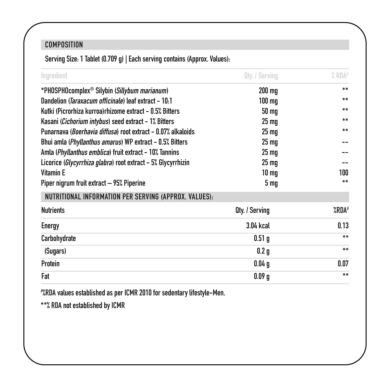

COMPOSITION
Serving Size: 1 Tablet (0.709 g) | Each serving contains (Approx. Values):

*PHOSPHOcomplex® Silybin (Sillybum marianum) 200 mg
Dandelion (Taraxacum officinale) leaf extract - 10:1 100 mg
Kutki (Picrorhiza kurroa)rhizome extract - 0.5% Bitters 50 mg
Kasani (Cichorium intybus) seed extract - 1% Bitters 25 mg
Punarnava (Boerhavia diffusa) root extract - 0.07% alkaloids 25 mg
Bhui amla (Phyllanthus amarus) WP extract - 0.5% Bitters 25 mg
Amla (Phyllanthus emblica) fruit extract - 10% Tannins 25 mg
Licorice (Glycyrrhiza glabra) root extract - 5% Glycyrrhizin 25 mg
Vitamin E 10 mg
Piper nigrum fruit extract — 95% Piperine 5 mg
NUTRITIONAL INFORMATION PER SERVING (APPROX. VALUES):

Nutrients Qty. / Serving

Energy 3.04 kcal
Carbohydrate 0.519

(Sugars) 0.29
Protein 0.04 g
Fat 0.09 g

"ZRDA values established as per ICMR 2010 for sedentary lifestyle-Men.
**% RDA not established by ICMR

 



In [41]:
def resize_image(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)
    return resized

# Resize the image by 150%
resized_image = resize_image(gray_image, 150)

# Display resized image
plt.imshow(resized_image, cmap='gray')
plt.axis('off')
plt.show()

# OCR on resized image
extracted_text = pytesseract.image_to_string(resized_image)
print(extracted_text)

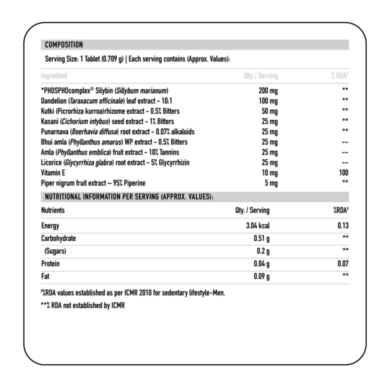

COMPOSITION
Serving Size: 1 Tablet (0.709 g) | Each serving contains (Approx. Values):

*PHOSPHOcomplex® Silybin (Sillybum marianum)
Dandelion (Taraxacum officinale) \eaf extract - 10:1
Kutki (Picrorhiza kurroa)rhizome extract - 0.52 Bitters
Kasani (Cichorium intybus) seed extract - 1% Bitters
Punarnava (Boerhavia diffusa) root extract - 0.07% alkaloids
Bhui amla (Phyllanthus amarus) WP extract - 0.5% Bitters
Amla (Phyllanthus emblica) fruit extract - 10% Tannins
Licorice (Glycyrrhiza glabra) root extract - 5% Glycyrrhizin
Vitamin E

Piper nigrum fruit extract — 95% Piperine

NUTRITIONAL INFORMATION PER SERVING (APPROX. VALUES):
Nutrients

Energy
Carbohydrate
(Sugars)
Protein
Fat
"IRDA values established as per ICMR 2010 for sedentary lifestyle-Men.
**7 RDA not established by ICMR

 



In [42]:
def remove_noise(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Apply noise removal
denoised_image = remove_noise(gray_image)

# Display denoised image
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')
plt.show()

# OCR on denoised image
extracted_text = pytesseract.image_to_string(denoised_image)
print(extracted_text)

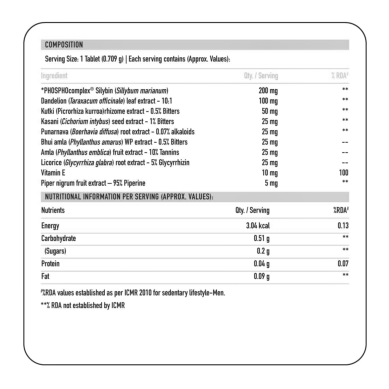

COMPOSITION
Serving Size: 1 Tablet (0.709 g) | Each serving contains (Approx. Values):

*PHOSPHOcomplex® Silybin (Sillybum marianum)
Dandelion (Taraxacum officinale) leaf extract - 10:1
Kutki (Picrorhiza kurroa)rhizome extract - 0.5% Bitters
Kasani (Cichorium intybus) seed extract - 1% Bitters
Punarnava (Boerhavia diffusa) root extract - 0.07% alkaloids
Bhui amla (Phyllanthus amarus) WP extract - 0.5% Bitters
Amla (Phyllanthus emblica) fruit extract - 10% Tannins
Licorice (Glycyrrhiza glabra) root extract - 5% Glycyrrhizin
Vitamin E
Piper nigrum fruit extract — 95% Piperine

NUTRITIONAL INFORMATION PER SERVING (APPROX. VALUES):

Nutrients

Energy

Carbohydrate
(Sugars)

Protein

Fat

"ZRDA values established as per ICMR 2010 for sedentary lifestyle-Men.
**Z RDA not established by ICMR

200 mg
100 mg
50 mg
25 mg
25 mg
25 mg
25 mg
25 mg
10mg
Smg

Qty. / Serving

3.04 kcal
O51
02g
0.049
0.09 g

 



In [43]:
# Increase contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization)
def increase_contrast(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(image)

# Apply contrast enhancement
contrast_image = increase_contrast(gray_image)

# Display contrast-enhanced image
plt.imshow(contrast_image, cmap='gray')
plt.axis('off')
plt.show()

# OCR on contrast-enhanced image
extracted_text = pytesseract.image_to_string(contrast_image)
print(extracted_text)
